In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTING NECESSARY PACKAGES**

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**DEFINING IMAGE TRANSFORMATIONS**

In [44]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

**LOADING DATASET**

In [45]:
train_dataset = datasets.CIFAR10(root='./data',\
              train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, \
                                batch_size=32, shuffle=True)

**DEFINING GAN HYPERPARAMETERS**

In [46]:
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 50

**BUILDING THE GENERATOR**

In [47]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        return img

**BUILDING THE DISCRIMINATOR**

In [48]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ZeroPad2d((0, 1, 0, 1)),
            nn.BatchNorm2d(64, momentum=0.82),
            nn.LeakyReLU(0.25),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128, momentum=0.82),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256, momentum=0.8),
            nn.LeakyReLU(0.25),
            nn.Dropout(0.25),
            nn.Flatten(),
            nn.Linear(256 * 5 * 5, 1),
            nn.Sigmoid()
        )
    def forward(self, img):
            validity = self.model(img)
            return validity

**INITIALIZING GAN COMPONENTS**

In [49]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters()\
                        , lr=lr, betas=(beta1, beta2))

optimizer_D = optim.Adam(discriminator.parameters()\
                        , lr=lr, betas = (beta1,beta2))

**TRAINING THE GAN**

Epoch [1/50]                        Batch 100/1563 Discriminator Loss: 0.6024 Generator Loss: 1.5101
Epoch [1/50]                        Batch 200/1563 Discriminator Loss: 0.6764 Generator Loss: 0.6449
Epoch [1/50]                        Batch 300/1563 Discriminator Loss: 0.7872 Generator Loss: 1.0389
Epoch [1/50]                        Batch 400/1563 Discriminator Loss: 0.5492 Generator Loss: 1.0408
Epoch [1/50]                        Batch 500/1563 Discriminator Loss: 0.6586 Generator Loss: 0.8854
Epoch [1/50]                        Batch 600/1563 Discriminator Loss: 0.6656 Generator Loss: 0.9373
Epoch [1/50]                        Batch 700/1563 Discriminator Loss: 0.5930 Generator Loss: 1.8509
Epoch [1/50]                        Batch 800/1563 Discriminator Loss: 0.9179 Generator Loss: 0.7370
Epoch [1/50]                        Batch 900/1563 Discriminator Loss: 0.5205 Generator Loss: 1.8133
Epoch [1/50]                        Batch 1000/1563 Discriminator Loss: 0.4960 Generator Lo

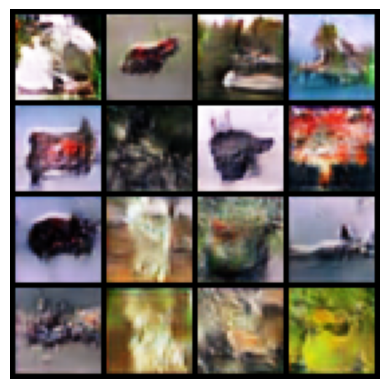

Epoch [11/50]                        Batch 100/1563 Discriminator Loss: 0.4754 Generator Loss: 1.9036
Epoch [11/50]                        Batch 200/1563 Discriminator Loss: 0.7355 Generator Loss: 0.8369
Epoch [11/50]                        Batch 300/1563 Discriminator Loss: 0.6260 Generator Loss: 1.4574
Epoch [11/50]                        Batch 400/1563 Discriminator Loss: 0.5525 Generator Loss: 1.2860
Epoch [11/50]                        Batch 500/1563 Discriminator Loss: 0.7809 Generator Loss: 0.6962
Epoch [11/50]                        Batch 600/1563 Discriminator Loss: 0.5379 Generator Loss: 0.9674
Epoch [11/50]                        Batch 700/1563 Discriminator Loss: 0.5224 Generator Loss: 1.1055
Epoch [11/50]                        Batch 800/1563 Discriminator Loss: 0.6039 Generator Loss: 1.3113
Epoch [11/50]                        Batch 900/1563 Discriminator Loss: 0.4194 Generator Loss: 1.5985
Epoch [11/50]                        Batch 1000/1563 Discriminator Loss: 0.4901 Ge

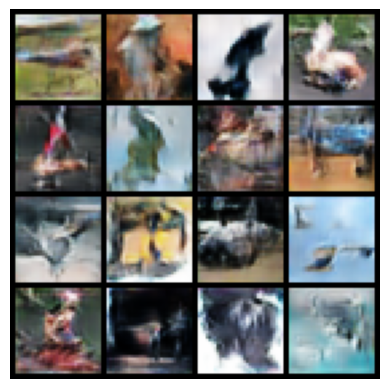

Epoch [21/50]                        Batch 100/1563 Discriminator Loss: 0.6344 Generator Loss: 1.1033
Epoch [21/50]                        Batch 200/1563 Discriminator Loss: 0.6392 Generator Loss: 1.1626
Epoch [21/50]                        Batch 300/1563 Discriminator Loss: 0.5349 Generator Loss: 1.0735
Epoch [21/50]                        Batch 400/1563 Discriminator Loss: 0.6538 Generator Loss: 1.0384
Epoch [21/50]                        Batch 500/1563 Discriminator Loss: 0.5414 Generator Loss: 0.5112
Epoch [21/50]                        Batch 600/1563 Discriminator Loss: 0.5327 Generator Loss: 1.0650
Epoch [21/50]                        Batch 700/1563 Discriminator Loss: 0.5612 Generator Loss: 0.8174
Epoch [21/50]                        Batch 800/1563 Discriminator Loss: 0.8091 Generator Loss: 0.5284
Epoch [21/50]                        Batch 900/1563 Discriminator Loss: 0.4016 Generator Loss: 1.0298
Epoch [21/50]                        Batch 1000/1563 Discriminator Loss: 0.4400 Ge

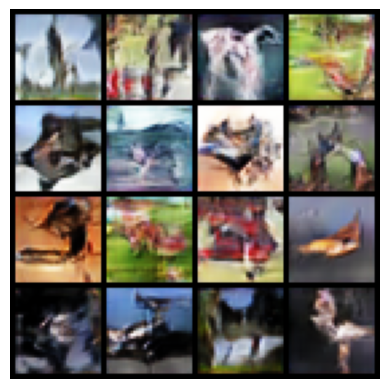

Epoch [31/50]                        Batch 100/1563 Discriminator Loss: 0.4706 Generator Loss: 1.4524
Epoch [31/50]                        Batch 200/1563 Discriminator Loss: 0.4422 Generator Loss: 1.4526
Epoch [31/50]                        Batch 300/1563 Discriminator Loss: 0.4368 Generator Loss: 0.9640
Epoch [31/50]                        Batch 400/1563 Discriminator Loss: 0.6853 Generator Loss: 0.9432
Epoch [31/50]                        Batch 500/1563 Discriminator Loss: 0.4725 Generator Loss: 2.2879
Epoch [31/50]                        Batch 600/1563 Discriminator Loss: 0.7415 Generator Loss: 1.3127
Epoch [31/50]                        Batch 700/1563 Discriminator Loss: 0.7072 Generator Loss: 1.6438
Epoch [31/50]                        Batch 800/1563 Discriminator Loss: 1.1611 Generator Loss: 1.5947
Epoch [31/50]                        Batch 900/1563 Discriminator Loss: 0.7498 Generator Loss: 1.8321
Epoch [31/50]                        Batch 1000/1563 Discriminator Loss: 0.5108 Ge

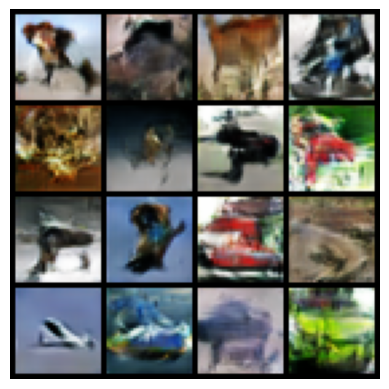

Epoch [41/50]                        Batch 100/1563 Discriminator Loss: 0.5643 Generator Loss: 1.2057
Epoch [41/50]                        Batch 200/1563 Discriminator Loss: 0.7801 Generator Loss: 1.2346
Epoch [41/50]                        Batch 300/1563 Discriminator Loss: 0.6402 Generator Loss: 1.3436
Epoch [41/50]                        Batch 400/1563 Discriminator Loss: 0.5018 Generator Loss: 1.8551
Epoch [41/50]                        Batch 500/1563 Discriminator Loss: 1.0313 Generator Loss: 1.0355
Epoch [41/50]                        Batch 600/1563 Discriminator Loss: 0.6589 Generator Loss: 0.9850
Epoch [41/50]                        Batch 700/1563 Discriminator Loss: 0.3447 Generator Loss: 1.2918
Epoch [41/50]                        Batch 800/1563 Discriminator Loss: 0.7273 Generator Loss: 1.0367
Epoch [41/50]                        Batch 900/1563 Discriminator Loss: 0.3243 Generator Loss: 0.7244
Epoch [41/50]                        Batch 1000/1563 Discriminator Loss: 0.4642 Ge

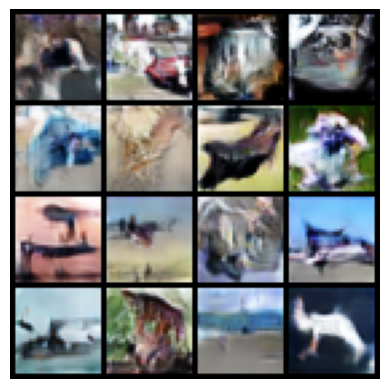

In [50]:
for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
       
        real_images = batch[0].to(device) 
       
        valid = torch.ones(real_images.size(0), 1, device=device)
        fake = torch.zeros(real_images.size(0), 1, device=device)
       
        real_images = real_images.to(device)

        optimizer_D.zero_grad()
       
        z = torch.randn(real_images.size(0), latent_dim, device=device)
      
        fake_images = generator(z)

        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
    
        d_loss.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()
      
        gen_images = generator(z)
        
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        g_loss.backward()
        optimizer_G.step()
       
        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()